                                               Model   Company       Color  \
0             5PLUS 5PHP28 Wired without Mic Headset     5PLUS         Red   
1  A R Wireless compatible with Headset Bluetooth...       A R         Red   
2  Aerizo Wireless Touch R100 Earbuds (Black) Blu...    Aerizo       Black   
3  Allmusic powerful driven bass with dynamic bea...  Allmusic  Multicolor   
4  Allmusic OPP.O Ultra HD Sound Premium Bass Spo...  Allmusic       Black   

             Type  Average Rating  Number of Ratings  Selling Price  \
0      On the Ear             3.6                101            496   
1      Multicolor             3.9              35280            188   
2   True Wireless             4.0               1934            589   
3      In the Ear             4.0              15841            260   
4      In the Ear             3.8              10766            270   

   Maximum Retail Price  Discount                          reviews  
0                  3399      2903  

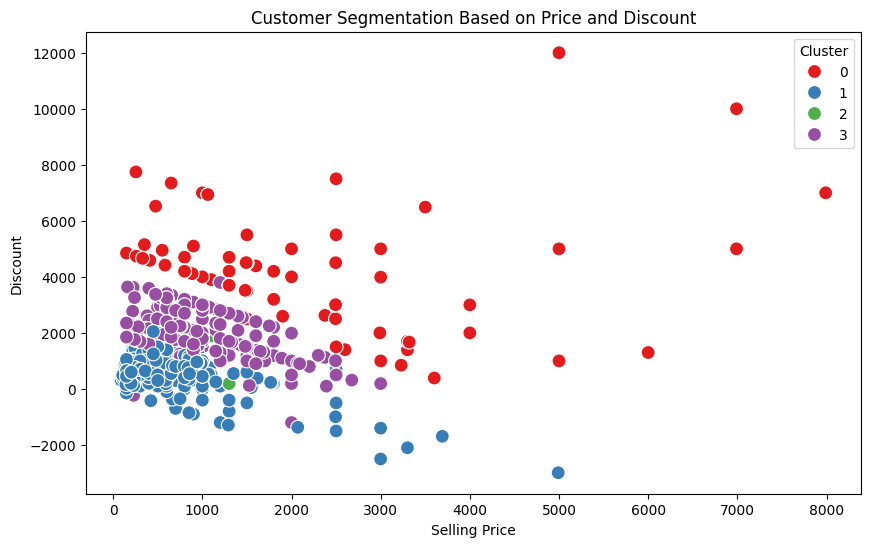

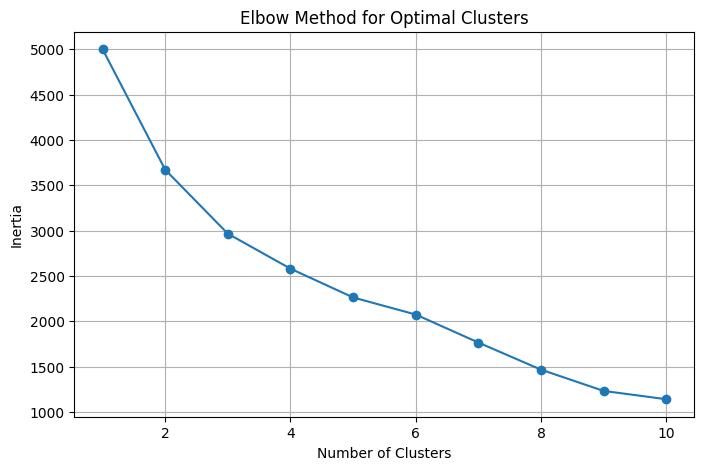

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming the dataset is a CSV file named 'flipkart_headphones.csv'
data = pd.read_csv('Flipkart Headphones.csv')

# Display the first few rows of the dataset
print(data.head())

# Check data types of the columns
print(data.dtypes)

# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Convert numeric columns to the appropriate data type
data['Average Rating'] = pd.to_numeric(data['Average Rating'], errors='coerce')
data['Number of Ratings'] = pd.to_numeric(data['Number of Ratings'], errors='coerce')
data['Selling Price'] = pd.to_numeric(data['Selling Price'], errors='coerce')
data['Maximum Retail Price'] = pd.to_numeric(data['Maximum Retail Price'], errors='coerce')
data['Discount'] = pd.to_numeric(data['Discount'], errors='coerce')

# Drop rows with any NaN values that may have resulted from conversion
data = data.dropna(subset=['Average Rating', 'Number of Ratings', 'Selling Price', 'Maximum Retail Price', 'Discount'])

# Select relevant features for clustering
features = ['Average Rating', 'Number of Ratings', 'Selling Price', 'Maximum Retail Price', 'Discount']

# Feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# K-Means clustering implementation
kmeans = KMeans(n_clusters=4, random_state=42)  # You can adjust the number of clusters
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Display the clustered data
print(data.head())

# Check the cluster centers (in the scaled space)
print("Cluster Centers (scaled): \n", kmeans.cluster_centers_)

# Inverse transform the cluster centers to the original scale
print("Cluster Centers (original scale): \n", scaler.inverse_transform(kmeans.cluster_centers_))

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Selling Price', y='Discount', hue='Cluster', data=data, palette='Set1', s=100)
plt.title('Customer Segmentation Based on Price and Discount')
plt.xlabel('Selling Price')
plt.ylabel('Discount')
plt.legend(title='Cluster')
plt.show()

# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()